In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/텍스트마이닝_기말과제

/content/drive/MyDrive/텍스트마이닝_기말과제


In [ ]:
!ls

'MBTI 500.csv'		        svm_classifier.pkl     텍스트마이닝_기말과제.ipynb
 random_forest_classifier.pkl   tfidf_vectorizer.pkl


In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import joblib
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stop_words.update(['er', 'ikke',"0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"])
pattern = r'[^\w\s]'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df = pd.read_csv("MBTI 500.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106067 entries, 0 to 106066
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   106067 non-null  object
 1   type    106067 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [ ]:
df

posts  type
0       know intj tool use interaction people excuse a...  INTJ
1       rap music ehh opp yeah know valid well know fa...  INTJ
2       preferably p hd low except wew lad video p min...  INTJ
3       drink like wish could drink red wine give head...  INTJ
4       space program ah bad deal meing freelance max ...  INTJ
...                                                   ...   ...
106062  stay frustrate world life want take long nap w...  INFP
106063  fizzle around time mention sure mistake thing ...  INFP
106064  schedule modify hey w intp strong wing underst...  INFP
106065  enfj since january busy schedule able spend li...  INFP
106066  feel like men good problem tell parent want te...  INFP

[106067 rows x 2 columns]

In [ ]:
df.head(5)

posts  type
0  know intj tool use interaction people excuse a...  INTJ
1  rap music ehh opp yeah know valid well know fa...  INTJ
2  preferably p hd low except wew lad video p min...  INTJ
3  drink like wish could drink red wine give head...  INTJ
4  space program ah bad deal meing freelance max ...  INTJ

In [ ]:
df.type.value_counts()

INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ENFJ     1534
ISTJ     1243
ISFP      875
ISFJ      650
ESTJ      482
ESFP      360
ESFJ      181
Name: type, dtype: int64

In [ ]:
for i in range(len(df)):
  text = df.loc[i, 'posts']
  text = text.lower() # 소문자 처리
  text = re.sub(pattern, '', text)
  # 단어 토큰화
  tokens = word_tokenize(text)

  # 불용어 제거
  # stop_words = set(stopwords.words('english'))
  filtered_tokens = [word for word in tokens if word not in stop_words]

  # 단어의 원형 복원 (lemmatization)
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

  # 전처리된 텍스트 출력
  processed_text = ' '.join(filtered_tokens)
  df.loc[i,'posts'] = processed_text


In [ ]:
# 중복된 행 제거
df.drop_duplicates(subset='posts', keep='first', inplace=True)

## 데이터를 봤을 때 각 MBTI 타입별 분포가 다르다는 것을 확인 할 수 있었습니다. </br> 이에 맞춰 데이터 불균형을 맞춰줍니다



In [ ]:
# 클래스별 데이터 수 확인
class_counts = df['type'].value_counts()

# 가장 적은 데이터 수 확인
min_class_count = class_counts.min()

# 각 클래스별 데이터 언더샘플링
undersampled_data = pd.DataFrame()

for cls in class_counts.index:
    cls_data = df[df['type'] == cls]
    undersampled_cls_data = resample(cls_data, replace=False, n_samples=min_class_count, random_state=42)
    undersampled_data = pd.concat([undersampled_data, undersampled_cls_data])

# 언더샘플링된 데이터 출력
print(undersampled_data['type'].value_counts())

INTP    181
INTJ    181
INFJ    181
INFP    181
ENTP    181
ENFP    181
ISTP    181
ENTJ    181
ESTP    181
ENFJ    181
ISTJ    181
ISFP    181
ISFJ    181
ESTJ    181
ESFP    181
ESFJ    181
Name: type, dtype: int64


In [ ]:
undersampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2896 entries, 36501 to 76063
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   posts   2896 non-null   object
 1   type    2896 non-null   object
dtypes: object(2)
memory usage: 67.9+ KB


In [ ]:
undersampled_data.head(5)

posts  type
36501  time resus entp intj intp answer truthfully iv...  INTP
32633  dispose fe aim unbiased channel damn good job ...  INTP
31392  people time arrow represent laptop awesome sch...  INTP
47256  achieve success future career choose ditto dif...  INTP
45097  term meditation region brain active wander act...  INTP

In [ ]:
undersampled_data = undersampled_data.reset_index(drop=True)

In [ ]:
undersampled_data.head(5)

posts  type
0  time resus entp intj intp answer truthfully iv...  INTP
1  dispose fe aim unbiased channel damn good job ...  INTP
2  people time arrow represent laptop awesome sch...  INTP
3  achieve success future career choose ditto dif...  INTP
4  term meditation region brain active wander act...  INTP

In [ ]:
print(len(undersampled_data))

2896


In [ ]:
undersampled_data[undersampled_data['type']== "ESTJ"].head(5)

posts  type
2353  work introvert analytically work logic logical...  ESTJ
2354  ozziechick guess shud post hey kwaran pretty c...  ESTJ
2355  reckon scandinavian country germany fluid term...  ESTJ
2356  realize truth life song ground root case talka...  ESTJ
2357  concrete backfire theory humanity discipline c...  ESTJ

In [ ]:
# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer(max_features=500)
X = tfidf_vectorizer.fit_transform(undersampled_data['posts'])
y = undersampled_data['type']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest 모델 생성 및 학습
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # 예시로 트리 100개 사용
rf_classifier.fit(X_train, y_train)

# 모델 평가
accuracy = rf_classifier.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

# 학습된 모델 저장
joblib.dump(rf_classifier, 'random_forest_classifier.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

Accuracy: 0.6706896551724137


['tfidf_vectorizer.pkl']

In [ ]:
a = list(set(undersampled_data['type'].tolist()))
a

['INFJ',
 'ISFP',
 'ISFJ',
 'ENFJ',
 'ENFP',
 'ISTJ',
 'INTP',
 'ENTP',
 'ISTP',
 'INTJ',
 'ENTJ',
 'ESFP',
 'ESTP',
 'INFP',
 'ESFJ',
 'ESTJ']

### ESFP

In [ ]:
estj_posts = undersampled_data[undersampled_data['type'] == 'ESTJ']['posts']
estj = estj_posts.to_list()
estj

### WordCloud 시각화

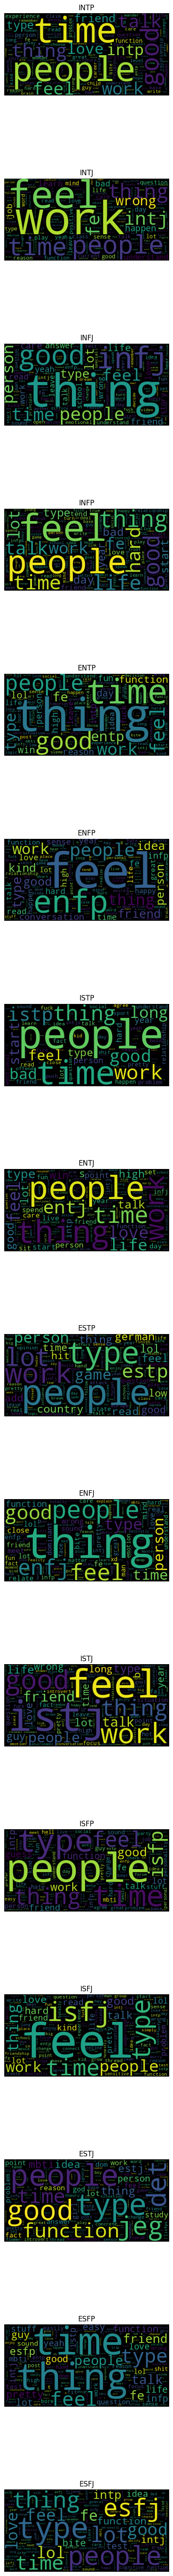

In [ ]:
from wordcloud import WordCloud, STOPWORDS

fig, ax = plt.subplots(len(undersampled_data['type'].unique()), sharex=True, figsize=(5,5*len(df['type'].unique())))

k = 0
for i in undersampled_data['type'].unique():
    df_4 = undersampled_data[undersampled_data['type'] == i]
    wordcloud = WordCloud().generate(df_4['posts'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(i)
    ax[k].axis("off")
    k+=1

# 최다 빈도수 단어들 확인

In [ ]:
post_counter = Counter()
for i in undersampled_data['type'].unique():

  new_df =  undersampled_data[undersampled_data['type'] == i]
  text_data = [k.split(" ") for k in new_df['posts'].to_list()]
  # print(text_data)
  # break
  # if i == "ESTJ":
  for d in text_data:
    post_counter = Counter(d)
  print(i,":",post_counter.most_common(10))
  # print(post_counter)

INTP : [('test', 7), ('type', 6), ('intp', 6), ('people', 6), ('function', 5), ('vote', 5), ('feel', 5), ('order', 4), ('point', 4), ('time', 3)]
INTJ : [('thing', 7), ('year', 6), ('state', 5), ('point', 4), ('respect', 4), ('totally', 3), ('people', 3), ('term', 3), ('elect', 3), ('programme', 3)]
INFJ : [('infjs', 6), ('good', 5), ('group', 5), ('fe', 5), ('understand', 4), ('people', 4), ('friend', 4), ('feel', 4), ('point', 3), ('sound', 3)]
INFP : [('people', 10), ('thing', 7), ('time', 6), ('speak', 5), ('feel', 4), ('fe', 4), ('understand', 4), ('good', 4), ('game', 3), ('thought', 3)]
ENTP : [('people', 11), ('bad', 8), ('fe', 6), ('thing', 5), ('care', 4), ('read', 4), ('woman', 4), ('love', 3), ('book', 3), ('post', 3)]
ENFP : [('friend', 6), ('talk', 6), ('enfp', 5), ('thing', 5), ('feel', 5), ('people', 5), ('type', 5), ('good', 4), ('idea', 4), ('social', 4)]
ISTP : [('people', 6), ('job', 5), ('thing', 5), ('talk', 4), ('interview', 4), ('hamas', 4), ('charter', 4), ('pa

## 유형별 MBTI 시각화

* E와 I의 주요 빈도 단어 시각화

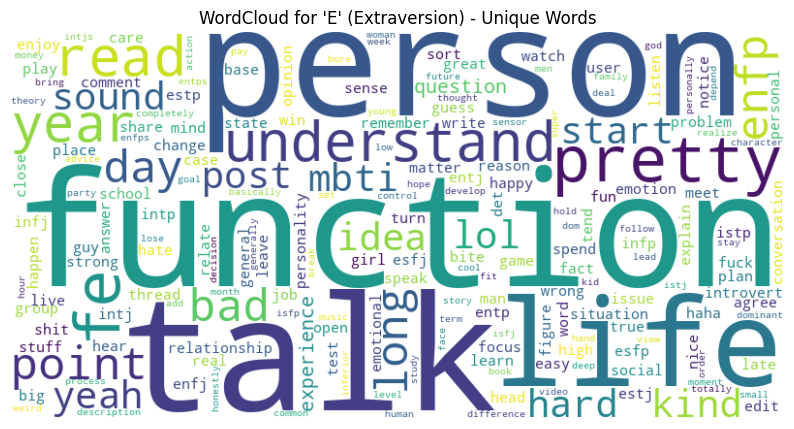

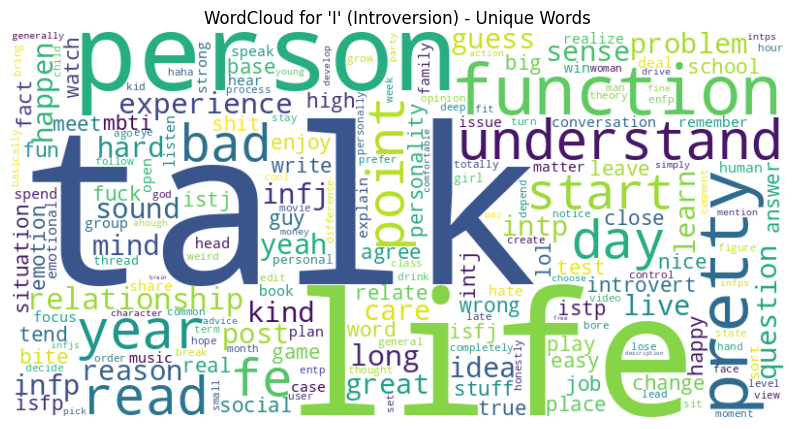

In [ ]:
# 'E' (Extraversion)와 'S' (Sensing) 성향을 가진 데이터 추출
e_data = undersampled_data[undersampled_data['type'].str.contains('E')]['posts']
i_data = undersampled_data[undersampled_data['type'].str.contains('I')]['posts']

# 전처리 및 단어 추출 함수 정의
def extract_words(data):
    # CountVectorizer를 사용하여 단어 빈도수 계산
    count_vectorizer = CountVectorizer(stop_words='english')
    count_data = count_vectorizer.fit_transform(data)
    words = count_vectorizer.get_feature_names_out()
    word_frequencies = count_data.toarray().sum(axis=0)
    word_freq_dict = dict(zip(words, word_frequencies))
    return word_freq_dict

# 'E' 성향에 해당하는 단어 추출
e_word_freq = extract_words(e_data)

# 'S' 성향에 해당하는 단어 추출
i_word_freq = extract_words(i_data)

# 'E'와 'S' 성향에서 곂치는 단어 중 빈도수가 가장 높은 상위 5개의 단어 추출
e_common_words = [word for word, _ in Counter(e_word_freq).most_common(10)]
i_common_words = [word for word, _ in Counter(i_word_freq).most_common(10)]

# 'E'와 'S' 성향에서 곂치는 단어를 제외한 단어 추출
e_unique_words = [word for word in e_word_freq if word not in i_common_words]
i_unique_words = [word for word in i_word_freq if word not in e_common_words]

# WordCloud 객체 생성하여 시각화
e_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies({word: freq for word, freq in e_word_freq.items() if word in e_unique_words})
i_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies({word: freq for word, freq in i_word_freq.items() if word in i_unique_words})

# 'E' 성향 WordCloud 시각화
plt.figure(figsize=(10, 6))
plt.imshow(e_wordcloud, interpolation='bilinear')
plt.title("WordCloud for 'E' (Extraversion) - Unique Words")
plt.axis('off')
plt.show()

# 'I' 성향 WordCloud 시각화
plt.figure(figsize=(10, 6))
plt.imshow(i_wordcloud, interpolation='bilinear')
plt.title("WordCloud for 'I' (Introversion) - Unique Words")
plt.axis('off')
plt.show()

* S와 N의 주요 빈도 단어 시각화

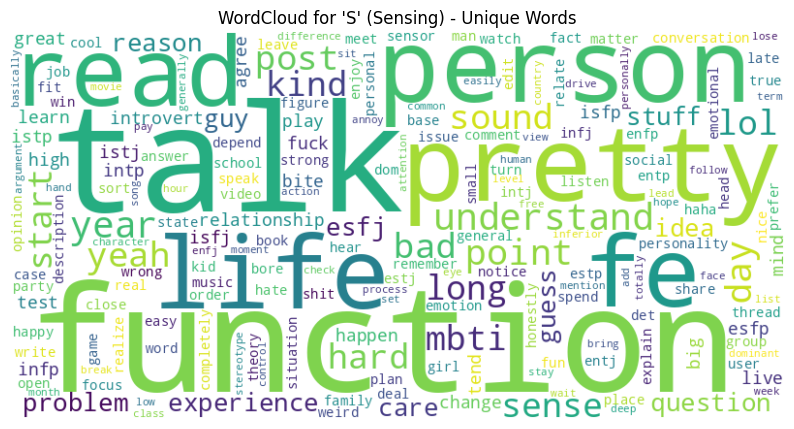

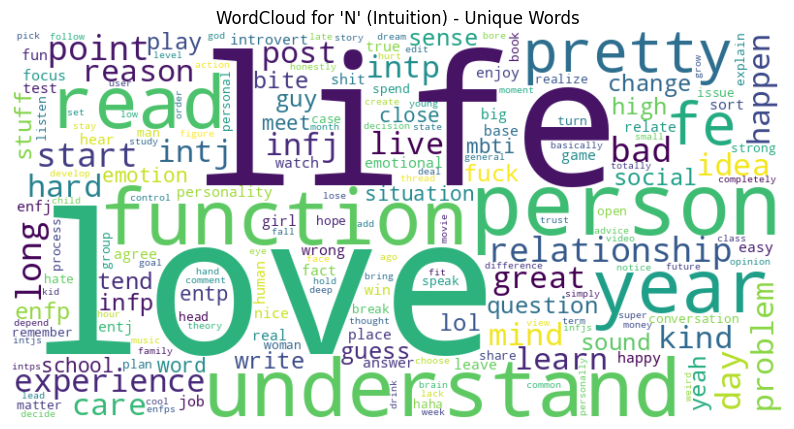

In [ ]:
# 'S' (Sensing)와 'N' (Intuition) 성향을 가진 데이터 추출
s_data = undersampled_data[undersampled_data['type'].str.contains('S')]['posts']
n_data = undersampled_data[undersampled_data['type'].str.contains('N')]['posts']

# 전처리 및 단어 추출 함수 정의
def extract_words(data):
    # CountVectorizer를 사용하여 단어 빈도수 계산
    count_vectorizer = CountVectorizer(stop_words='english')
    count_data = count_vectorizer.fit_transform(data)
    words = count_vectorizer.get_feature_names_out()
    word_frequencies = count_data.toarray().sum(axis=0)
    word_freq_dict = dict(zip(words, word_frequencies))
    return word_freq_dict

# 'S' 성향에 해당하는 단어 추출
s_word_freq = extract_words(s_data)

# 'N' 성향에 해당하는 단어 추출
n_word_freq = extract_words(n_data)

# 'S'와 'N' 성향에서 곂치는 단어 중 빈도수가 가장 높은 상위 10개의 단어 추출
s_common_words = [word for word, _ in Counter(s_word_freq).most_common(10)]
n_common_words = [word for word, _ in Counter(n_word_freq).most_common(10)]

# 'S'와 'N' 성향에서 곂치는 단어를 제외한 단어 추출
s_unique_words = [word for word in s_word_freq if word not in n_common_words]
n_unique_words = [word for word in n_word_freq if word not in s_common_words]

# WordCloud 객체 생성하여 시각화
s_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies({word: freq for word, freq in s_word_freq.items() if word in s_unique_words})
n_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies({word: freq for word, freq in n_word_freq.items() if word in n_unique_words})

# 'S' 성향 WordCloud 시각화
plt.figure(figsize=(10, 6))
plt.imshow(s_wordcloud, interpolation='bilinear')
plt.title("WordCloud for 'S' (Sensing) - Unique Words")
plt.axis('off')
plt.show()

# 'N' 성향 WordCloud 시각화
plt.figure(figsize=(10, 6))
plt.imshow(n_wordcloud, interpolation='bilinear')
plt.title("WordCloud for 'N' (Intuition) - Unique Words")
plt.axis('off')
plt.show()


* 'T'와 'F'의 주요 빈도 단어 시각화

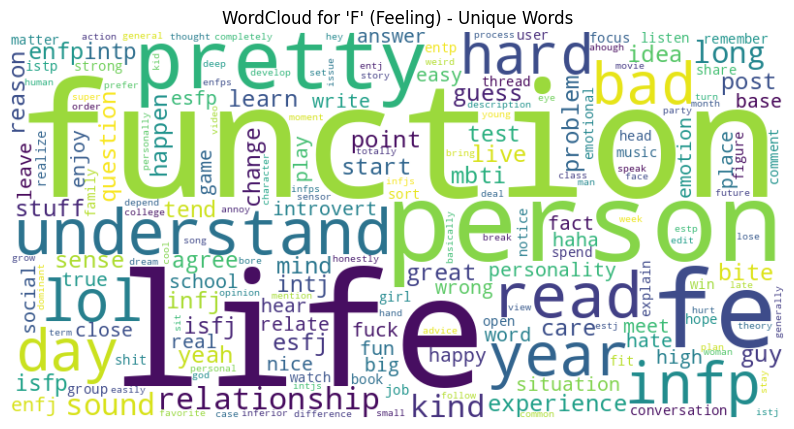

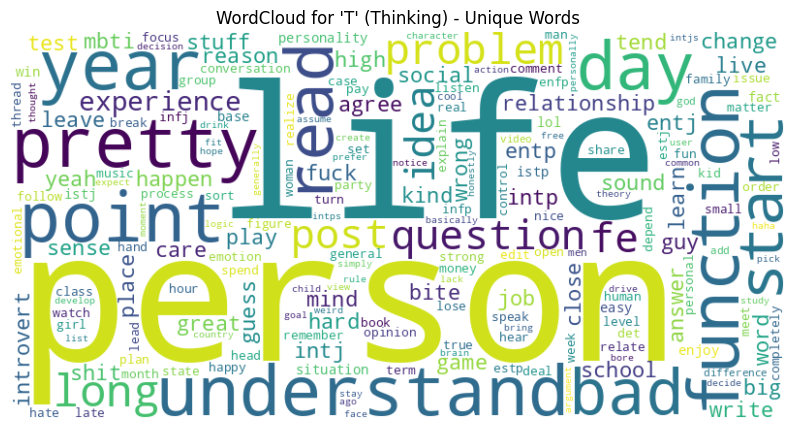

In [ ]:
# 'F' (Feeling)와 'T' (Thinking) 성향을 가진 데이터 추출
f_data = undersampled_data[undersampled_data['type'].str.contains('F')]['posts']
t_data = undersampled_data[undersampled_data['type'].str.contains('T')]['posts']

# 전처리 및 단어 추출 함수 정의
def extract_words(data):
    # CountVectorizer를 사용하여 단어 빈도수 계산
    count_vectorizer = CountVectorizer(stop_words='english')
    count_data = count_vectorizer.fit_transform(data)
    words = count_vectorizer.get_feature_names_out()
    word_frequencies = count_data.toarray().sum(axis=0)
    word_freq_dict = dict(zip(words, word_frequencies))
    return word_freq_dict

# 'F' 성향에 해당하는 단어 추출
f_word_freq = extract_words(f_data)

# 'T' 성향에 해당하는 단어 추출
t_word_freq = extract_words(t_data)

f_common_words = [word for word, _ in Counter(f_word_freq).most_common(10)]
t_common_words = [word for word, _ in Counter(t_word_freq).most_common(10)]

# 'F', 'T' 성향에서 곂치는 단어를 제외한 단어 추출
f_unique_words = [word for word in f_word_freq if word not in s_common_words + n_common_words + t_common_words]
t_unique_words = [word for word in t_word_freq if word not in s_common_words + n_common_words + f_common_words]

# WordCloud 객체 생성하여 시각화
f_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies({word: freq for word, freq in f_word_freq.items() if word in f_unique_words})
t_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies({word: freq for word, freq in t_word_freq.items() if word in t_unique_words})

# 'F' 성향 WordCloud 시각화
plt.figure(figsize=(10, 6))
plt.imshow(f_wordcloud, interpolation='bilinear')
plt.title("WordCloud for 'F' (Feeling) - Unique Words")
plt.axis('off')
plt.show()

# 'T' 성향 WordCloud 시각화
plt.figure(figsize=(10, 6))
plt.imshow(t_wordcloud, interpolation='bilinear')
plt.title("WordCloud for 'T' (Thinking) - Unique Words")
plt.axis('off')
plt.show()


* 'P'와 'J'의 주요 빈도 단어 시각화

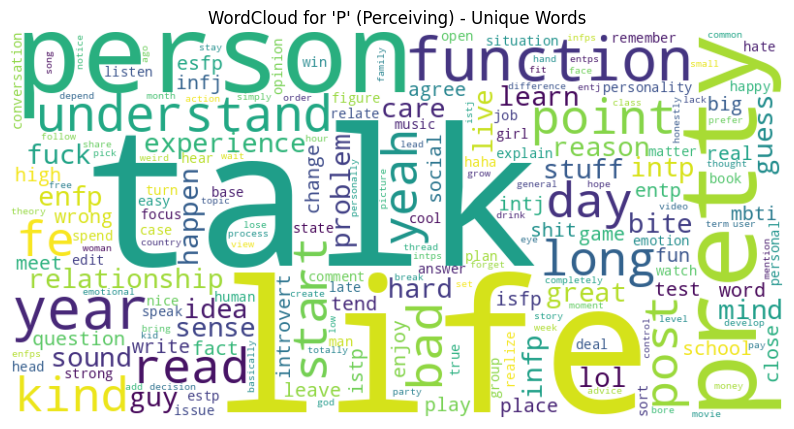

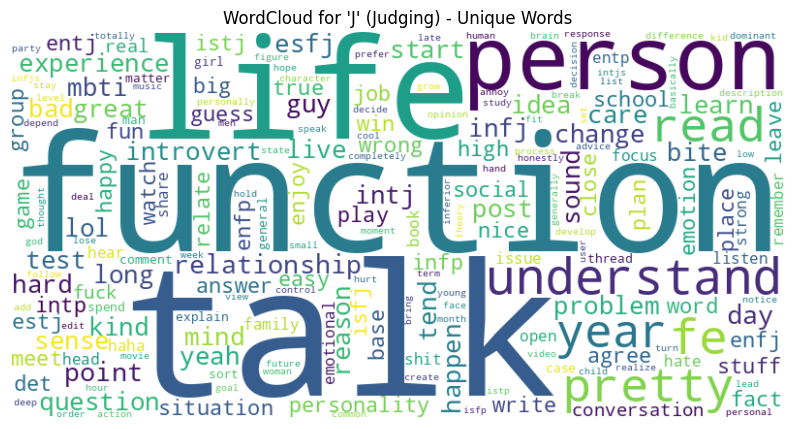

In [ ]:
# 'P' (Perceiving)와 'J' (Judging) 성향을 가진 데이터 추출
p_data = undersampled_data[undersampled_data['type'].str.contains('P')]['posts']
j_data = undersampled_data[undersampled_data['type'].str.contains('J')]['posts']

# 전처리 및 단어 추출 함수 정의
def extract_words(data):
    # CountVectorizer를 사용하여 단어 빈도수 계산
    count_vectorizer = CountVectorizer(stop_words='english')
    count_data = count_vectorizer.fit_transform(data)
    words = count_vectorizer.get_feature_names_out()
    word_frequencies = count_data.toarray().sum(axis=0)
    word_freq_dict = dict(zip(words, word_frequencies))
    return word_freq_dict

# 'P' 성향에 해당하는 단어 추출
p_word_freq = extract_words(p_data)

# 'J' 성향에 해당하는 단어 추출
j_word_freq = extract_words(j_data)

# 'P'와 'J' 성향에서 곂치는 단어 중 빈도수가 가장 높은 상위 10개의 단어 추출
p_common_words = [word for word, _ in Counter(p_word_freq).most_common(10)]
j_common_words = [word for word, _ in Counter(j_word_freq).most_common(10)]

# 'P'와 'J' 성향에서 곂치는 단어를 제외한 단어 추출
p_unique_words = [word for word in p_word_freq if word not in j_common_words]
j_unique_words = [word for word in j_word_freq if word not in p_common_words]

# WordCloud 객체 생성하여 시각화
p_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies({word: freq for word, freq in p_word_freq.items() if word in p_unique_words})
j_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies({word: freq for word, freq in j_word_freq.items() if word in j_unique_words})

# 'P' 성향 WordCloud 시각화
plt.figure(figsize=(10, 6))
plt.imshow(p_wordcloud, interpolation='bilinear')
plt.title("WordCloud for 'P' (Perceiving) - Unique Words")
plt.axis('off')
plt.show()

# 'J' 성향 WordCloud 시각화
plt.figure(figsize=(10, 6))
plt.imshow(j_wordcloud, interpolation='bilinear')
plt.title("WordCloud for 'J' (Judging) - Unique Words")
plt.axis('off')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


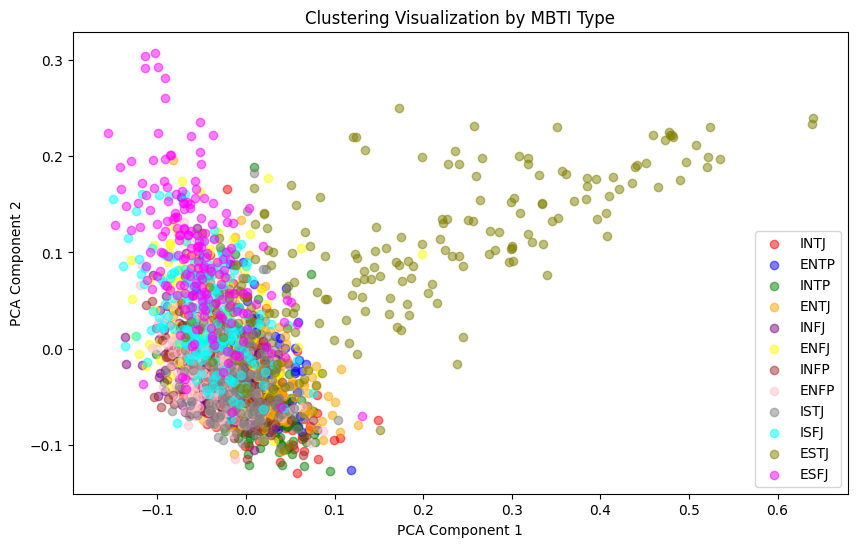

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(undersampled_data['posts'])

# 클러스터링 (K-means)
kmeans = KMeans(n_clusters=5)  # 클러스터 개수 설정
kmeans.fit(X)

# 차원 축소 (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# 시각화
undersampled_data['cluster'] = kmeans.labels_
undersampled_data['pca1'] = X_pca[:, 0]
undersampled_data['pca2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))

# MBTI 유형에 따른 색상 지정
mbti_colors = {'INTJ': 'red', 'ENTP': 'blue', 'INTP': 'green', 'ENTJ': 'orange', 'INFJ': 'purple',
               'ENFJ': 'yellow', 'INFP': 'brown', 'ENFP': 'pink', 'ISTJ': 'gray', 'ISFJ': 'cyan',
               'ESTJ': 'olive', 'ESFJ': 'magenta'}

for mbti_type, color in mbti_colors.items():
    temp_df = undersampled_data[undersampled_data['type'] == mbti_type]
    plt.scatter(temp_df['pca1'], temp_df['pca2'], c=color, label=mbti_type, alpha=0.5)

plt.title('Clustering Visualization by MBTI Type')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

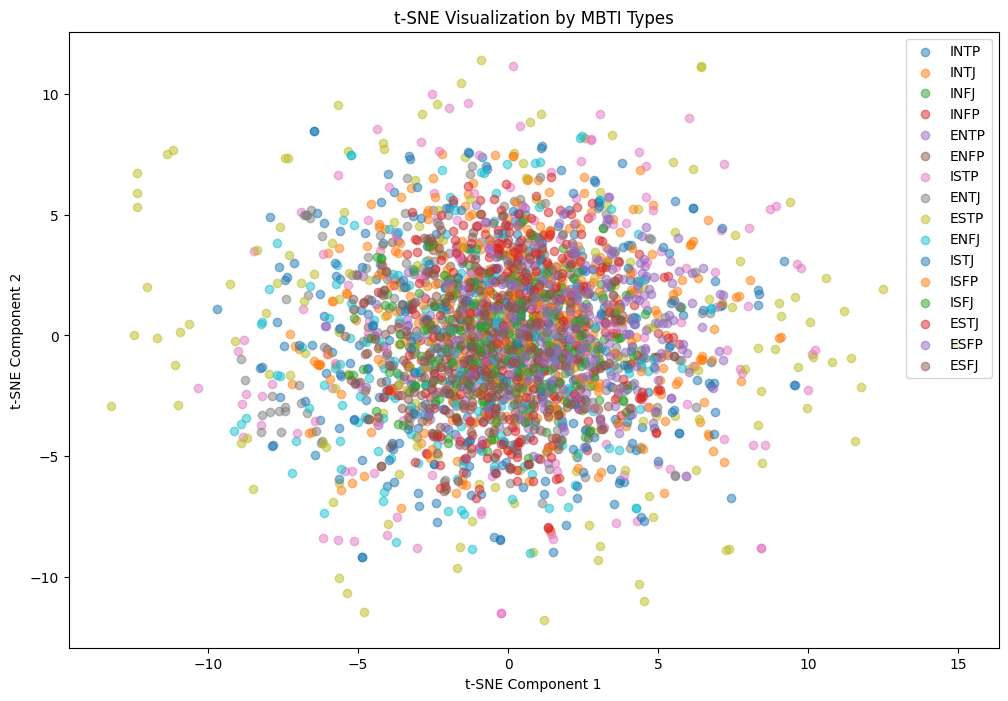

In [ ]:
# TF-IDF 벡터 생성
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(undersampled_data['posts'])

# t-SNE를 사용하여 2차원으로 축소하여 각 MBTI 유형별로 시각화
mbti_types = undersampled_data['type'].unique()

plt.figure(figsize=(12, 8))

for mbti_type in mbti_types:
    # 해당 MBTI 유형에 해당하는 데이터 추출
    temp_df = undersampled_data[undersampled_data['type'] == mbti_type]

    # TF-IDF 벡터화
    X_mbti = vectorizer.transform(temp_df['posts'])

    # t-SNE를 사용하여 2차원으로 축소
    tsne = TSNE(n_components=2, random_state=200)
    X_tsne = tsne.fit_transform(X_mbti.toarray())

    # 시각화
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], label=mbti_type, alpha=0.5)

plt.title('t-SNE Visualization by MBTI Types')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

In [ ]:
# 특성 추출 (TF-IDF 활용)
tfidf_vectorizer = TfidfVectorizer(max_features=2300)  # TF-IDF 벡터화
X = tfidf_vectorizer.fit_transform(undersampled_data['posts'])  # 텍스트 데이터를 TF-IDF 특성으로 변환
y = undersampled_data['type']  # MBTI 유형 (타겟)

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 훈련 (SVM 분류기 사용 예시)
svm_classifier = SVC(kernel='linear')  # SVM 모델 생성
svm_classifier.fit(X_train, y_train)  # 모델 훈련
# 학습된 모델을 파일로 저장
joblib.dump(svm_classifier, 'svm_classifier.pkl')

# 모델 평가
predictions = svm_classifier.predict(X_test)  # 테스트 데이터 예측
accuracy = accuracy_score(y_test, predictions)  # 정확도 계산
print(f'Accuracy: {accuracy}')

# 분류 보고서 출력
print(classification_report(y_test, predictions))

Accuracy: 0.7172413793103448
              precision    recall  f1-score   support

        ENFJ       0.73      0.75      0.74        36
        ENFP       0.74      0.85      0.79        34
        ENTJ       0.77      0.62      0.69        32
        ENTP       0.62      0.68      0.65        31
        ESFJ       0.97      0.74      0.84        43
        ESFP       0.76      0.74      0.75        34
        ESTJ       0.97      0.78      0.86        40
        ESTP       0.90      0.83      0.86        42
        INFJ       0.77      0.61      0.68        49
        INFP       0.52      0.71      0.60        31
        INTJ       0.47      0.74      0.58        38
        INTP       0.66      0.68      0.67        34
        ISFJ       0.82      0.76      0.79        37
        ISFP       0.47      0.75      0.58        24
        ISTJ       0.74      0.59      0.66        34
        ISTP       0.82      0.66      0.73        41

    accuracy                           0.72       5

In [ ]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# 임의의 텍스트 데이
new_text = ["In the realm of intellect and innovation, certain individuals possess an innate ability to envision the future, dissect complex problems, and engineer innovative solutions. These individuals exhibit a unique blend of analytical prowess, strategic thinking, and a relentless pursuit of knowledge. Their visionary mindset is characterized by an insatiable curiosity and a deep understanding of underlying patterns. They excel in dissecting intricate systems, identifying inefficiencies, and architecting solutions that push the boundaries of conventional thinking. Moreover, these individuals are driven by a passion for continuous improvement. They meticulously gather information, analyze data, and meticulously plan their actions, ensuring that every decision aligns with their long-term goals. Their independent and analytical nature often leads them to question established norms, challenge conventions, and seek unconventional pathways. They value autonomy and are not afraid to stand apart from the crowd in pursuit of their vision. Furthermore, their confidence in their ideas coupled with their ability to foresee potential outcomes aids them in making informed decisions. They possess a rare ability to foresee obstacles and plan contingencies in advance. In summary, individuals embodying these traits operate as strategic visionaries in their fields, steering through complexity with precision and constantly seeking innovative solutions that shape the future.",
            "I like making plans and I like animals. And he is very empathetic and likes to hang out with people.",
            "I like making plans and I prefer hang out with under 3 people. Many people who is stupid makes me mad. I love playing games alone in my home",
            "You are a stable and reliable individual. You tend to be pragmatic, organized, and systematic in handling tasks. Additionally, you pay attention to details and value real-life experiences and facts. You have a strong adaptability to change and enjoy taking responsibility and doing your best in the tasks assigned to you."]
# 불러온 학습된 모델
loaded_model = joblib.load('svm_classifier.pkl')

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer(max_features=2300)
tfidf_vectorizer.fit(undersampled_data['posts'])
# 기존에 학습된 TF-IDF 벡터화 모델 사용하여 새로운 데이터 벡터화


X_new = tfidf_vectorizer.transform(new_text)


# 예측
predictions_new = loaded_model.predict(X_new)

# 결과 출력
for text, prediction in zip(new_text, predictions_new):
    print(f"Text: {text}")
    print(f"Predicted MBTI Type: {prediction}")
    print("--------------")


Text: In the realm of intellect and innovation, certain individuals possess an innate ability to envision the future, dissect complex problems, and engineer innovative solutions. These individuals exhibit a unique blend of analytical prowess, strategic thinking, and a relentless pursuit of knowledge. Their visionary mindset is characterized by an insatiable curiosity and a deep understanding of underlying patterns. They excel in dissecting intricate systems, identifying inefficiencies, and architecting solutions that push the boundaries of conventional thinking. Moreover, these individuals are driven by a passion for continuous improvement. They meticulously gather information, analyze data, and meticulously plan their actions, ensuring that every decision aligns with their long-term goals. Their independent and analytical nature often leads them to question established norms, challenge conventions, and seek unconventional pathways. They value autonomy and are not afraid to stand apart